In [1]:
print("WELCOME TO GOOGLE COLABORATORY")
print("==============================")

WELCOME TO GOOGLE COLABORATORY


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
d1=pd.read_excel('Lab Session1 Data.xlsx',sheet_name='Purchase data')
d2=pd.read_excel('Lab Session1 Data.xlsx',sheet_name='IRCTC Stock Price')
d1.drop(d1.iloc[:,5:22],inplace=True,axis=1)
A=d1.iloc[:,1:-1].values
C=d1.iloc[:,-1].values
A=np.array(A)
C=np.array(C)
print("Matrix of A:")
print(A)
print("Matrix of C:")
print(C)
rank=np.linalg.matrix_rank(A)
print("Rank of Matrix A:", rank)
inverse=np.linalg.pinv(A)
print("Inverse of Matrix A:", inverse)
product_costs = np.dot(inverse, C)
print("The Cost Of Each Product",product_costs)

Matrix of A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
Matrix of C:
[386 289 393 110 280 167 271 274 148 198]
Rank of Matrix A: 3
Inverse of Matrix A: [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
The Cost Of Each Product [ 1. 55. 18.]


# New Section

Mean: 1560.6634538152612
Variance: 58496.49239931613
Sample mean: 1550.7060000000001
April mean: 1698.9526315789474
Probability of making a loss: 0.5020080321285141
Probability of making a profit on Wednesday: 0.42
Conditional probability of making a profit, given that today is Wednesday: 2.0916


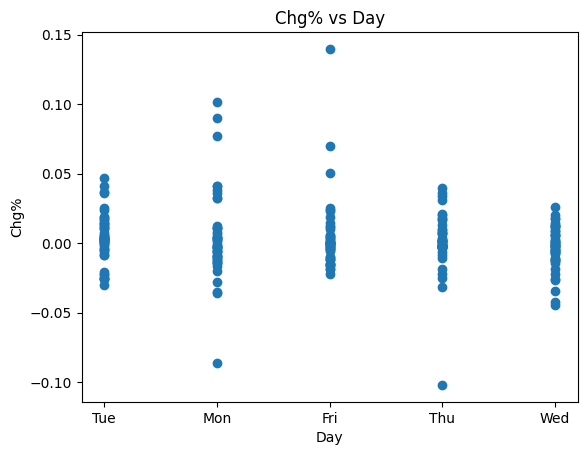

In [ ]:
#LAB-1 A4
# Read the Excel data into a Pandas DataFrame
df = pd.read_excel(r"Lab Session1 Data.xlsx",sheet_name="IRCTC Stock Price")
# Select the Price column
price_data = df['Price']

# Calculate the mean and variance of the Price column
mean = np.mean(price_data)
variance = np.var(price_data)
print('Mean:', mean)
print('Variance:', variance)

# Select the price data for all Wednesdays
wednesday_data = price_data[df['Day'] == 'Wed']
#print(wednesday_data)
# Calculate the sample mean
sample_mean = np.mean(wednesday_data)
print('Sample mean:', sample_mean)

# Select the price data for the month of April
april_data = price_data[df['Month'] == 'Apr']
# Calculate the sample mean
april_mean = np.mean(april_data)
print('April mean:', april_mean)
chg_data = df['Chg%']

# Create a new column called 'is_loss' that indicates whether the stock price went up or down
is_loss = np.where(chg_data > 0, False, True)

# Calculate the probability of making a loss
probability_of_loss = np.mean(is_loss)
print('Probability of making a loss:', probability_of_loss)

# Filter the data for Wednesdays
wednesday_data = df[df['Day'] == 'Wed']

# Calculate the probability of making a profit
probability_of_profit_on_wednesday = np.mean(wednesday_data['Chg%'] > 0)
print('Probability of making a profit on Wednesday:', probability_of_profit_on_wednesday)

# Calculate the probability of it being a Wednesday
probability_of_wednesday = np.mean(df['Day'] == 'Wed')

# Calculate the conditional probability
conditional_probability = probability_of_profit_on_wednesday / probability_of_wednesday

print('Conditional probability of making a profit, given that today is Wednesday:', conditional_probability)
# Create a scatter plot of Chg% vs Day

plt.scatter(df['Day'], df['Chg%'])
plt.xlabel('Day')
plt.ylabel('Chg%')
plt.title('Chg% vs Day')
plt.show()

In [ ]:
#LAB-1 A3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the data into a pandas DataFrame
data_frame = pd.read_excel(r"Lab Session1 Data.xlsx", sheet_name="Purchase data")
df=data1=data_frame.iloc[0:10,0:5]

# Create a new column 'Label' based on the Payment criterion
df['Label'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
print(df)
# Separate features (X) and labels (y)
X = df.drop(['Customer', 'Payment (Rs)', 'Label'], axis=1)
y = df['Label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Label
0      C_1           20             6                 2           386  RICH
1      C_2           16             3                 6           289  RICH
2      C_3           27             6                 2           393  RICH
3      C_4           19             1                 2           110  POOR
4      C_5           24             4                 2           280  RICH
5      C_6           22             1                 5           167  POOR
6      C_7           15             4                 2           271  RICH
7      C_8           18             4                 2           274  RICH
8      C_9           21             1                 4           148  POOR
9     C_10           16             2                 4           198  POOR
              precision    recall  f1-score   support

        POOR       1.00      1.00      1.00         1
        RICH       1.00      1.00      1.00         1

